# Semimajor axes and dispersion timescales of the established streams

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np, pandas as pd
from matplotlib.ticker import FormatStrFormatter

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [2]:
d = pd.read_csv('../data/granvik.dat', delim_whitespace=True, names=['description', 'a (AU)', 'e', 'i (deg)', \
                                                    'node (deg)', 'peri (deg)', 'MA (deg)', 'q (AU)', 'Q (AU)', \
                                                      'formation-Whipple (yr)', 'dispersion-Whipple (yr)', 'visible-Whipple (yr)', \
                                                      'formation-grav (yr)', 'dispersion-grav (yr)', 'visible-grav (yr)'])

In [3]:
def tj(a, e, i):
    return 5.2/a + 2*np.sqrt((1-e**2)*a/5.2)*np.cos(np.deg2rad(i))

tj = tj(d['a (AU)'], d['e'], d['i (deg)'])

In [11]:
mdc = pd.read_csv('../data/streamfulldata_established.csv', sep='\t', \
                usecols=[3,4,7,8,9,12,13,14,15,16,17,18,22,24], \
                names=['code', 'name', 'slon', 'RA', 'DEC', 'Vg', 'a', 'q', 'e', 'w', 'om', 'i', 'parent', 'tech'], \
                dtype={'status':np.int8, 'slon':np.float64, 'RA':np.float64, 'DEC':np.float64, 'Vg':np.float64, \
                      'a':np.float64, 'q':np.float64})

shrWidthTj = pd.read_csv('../data/established_age.dat', sep='\t')

In [12]:
shr = np.sort(pd.unique(mdc['code']))

meana_list = []

for shri in shr:
    meana = round(pd.DataFrame.mean(mdc['a'].where(mdc['code'] == shri)), 1)
    meana_list.append(meana)

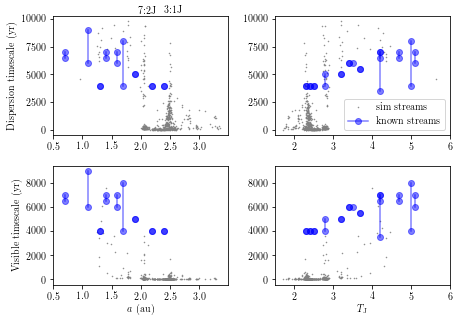

In [13]:
f, ax = plt.subplots(2, 2, figsize=(6.5, 4.5))

ax[0][0].plot(d['a (AU)'], d['dispersion-grav (yr)'], '.', markersize=1, color='gray')
#ax[0][0].set_xlabel('$a$ (au)')
ax[0][0].set_ylabel('Dispersion timescale (yr)')
ax[0][0].set_xlim([0.9, 3.5])
ax[0][0].set_xticks(np.arange(0.5, 3.5, step=0.5))
for i in list(range(14)):
    if np.isnan(shrWidthTj['optical_age'][i]):
        ax[0][0].plot([meana_list[i]], [shrWidthTj['radar_age'][i]], 'bo', alpha=0.5)
    else:
        ax[0][0].plot([meana_list[i], meana_list[i]], [shrWidthTj['optical_age'][i], shrWidthTj['radar_age'][i]], 'bo-', \
                  alpha=0.5)

ax[0][0].text(2.4, 10500, '3:1J')
ax[0][0].text(1.95, 10500, '7:2J')

ax[0][1].plot(tj, d['dispersion-grav (yr)'], '.', markersize=1, color='gray', label='sim streams')
#ax[0][1].set_xlabel(r'$T_\mathrm{J}$')
ax[0][1].set_xlim([1.5, 6.0])
for i in list(range(14)):
    if np.isnan(shrWidthTj['optical_age'][i]):
        ax[0][1].plot([shrWidthTj['Tj'][i]], [shrWidthTj['radar_age'][i]], 'bo', alpha=0.5)
    else:
        ax[0][1].plot([shrWidthTj['Tj'][i], shrWidthTj['Tj'][i]], [shrWidthTj['optical_age'][i], shrWidthTj['radar_age'][i]], \
                  'bo-', alpha=0.5)

ax[0][1].plot([], [], 'bo-', alpha=0.5, label='known streams')
ax[0][1].legend()

# ----------------------------

ax[1][0].plot(d['a (AU)'], d['visible-grav (yr)'], '.', markersize=1, color='gray')
ax[1][0].set_xlabel('$a$ (au)')
ax[1][0].set_ylabel('Visible timescale (yr)')
ax[1][0].set_xlim([0.9, 3.5])
ax[1][0].set_xticks(np.arange(0.5, 3.5, step=0.5))
for i in list(range(14)):
    if np.isnan(shrWidthTj['optical_age'][i]):
        ax[1][0].plot([meana_list[i]], [shrWidthTj['radar_age'][i]], 'bo', alpha=0.5)
    else:
        ax[1][0].plot([meana_list[i], meana_list[i]], [shrWidthTj['optical_age'][i], shrWidthTj['radar_age'][i]], 'bo-', \
                  alpha=0.5)


ax[1][1].plot(tj, d['visible-grav (yr)'], '.', markersize=1, color='gray', label='sim streams')
ax[1][1].set_xlabel(r'$T_\mathrm{J}$')
ax[1][1].set_xlim([1.5, 6.0])
for i in list(range(14)):
    if np.isnan(shrWidthTj['optical_age'][i]):
        ax[1][1].plot([shrWidthTj['Tj'][i]], [shrWidthTj['radar_age'][i]], 'bo', alpha=0.5)
    else:
        ax[1][1].plot([shrWidthTj['Tj'][i], shrWidthTj['Tj'][i]], [shrWidthTj['optical_age'][i], shrWidthTj['radar_age'][i]], \
                  'bo-', alpha=0.5)
        
f.tight_layout()
plt.savefig('time-a-tj-known.pdf')
plt.show()